In [3]:
# Mengimpor Library atau dependency yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from collections import deque
import random
import gym

In [4]:
# Memuat data crude oil price csv
co_data = pd.read_csv('crude-oil-price.csv')

In [5]:
#Menampilkan lima baris pertama untuk mengetahui isi dari csv itu sendiri
print(co_data.head())

                        date  price  percentChange  change
0  1983-06-01 00:00:00+00:00  31.38            NaN     NaN
1  1983-07-01 00:00:00+00:00  32.00          1.976    0.62
2  1983-08-01 00:00:00+00:00  31.59         -1.281   -0.41
3  1983-09-01 00:00:00+00:00  30.36         -3.894   -1.23
4  1983-10-01 00:00:00+00:00  30.37          0.033    0.01


In [6]:
# Tipe data untuk mengetahui tipe data pada csv
print(co_data.dtypes)

date              object
price            float64
percentChange    float64
change           float64
dtype: object


In [7]:
# Statistik data dasar untuk mengetahui
# beberapa kemungkinan yang terjadi berdasarkan statistika dasar
print(co_data.describe())

            price  percentChange      change
count  494.000000     493.000000  493.000000
mean    46.325888       0.737925    0.105974
std     29.083015      10.512494    4.973496
min     10.420000     -54.245000  -32.830000
25%     20.420000      -5.332000   -1.720000
50%     33.685000       0.929000    0.270000
75%     69.322500       6.377000    2.400000
max    140.000000      88.376000   16.650000


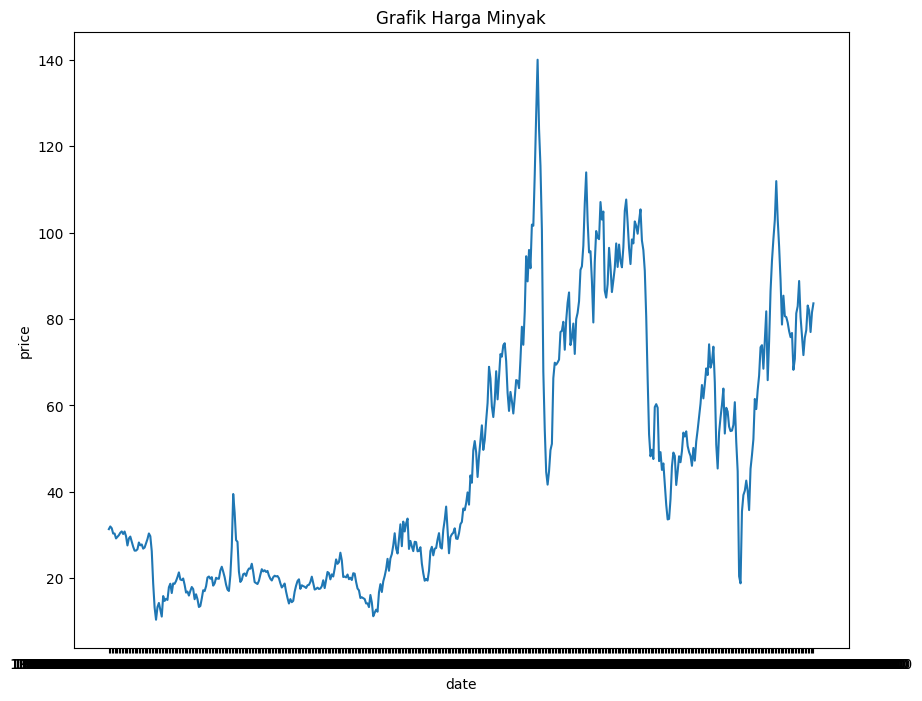

In [8]:
#Plot garis waktu vs Harga
plt.figure(figsize=(10, 8))
sns.lineplot(data=co_data, x='date', y='price')
plt.title('Grafik Harga Minyak')
plt.show()

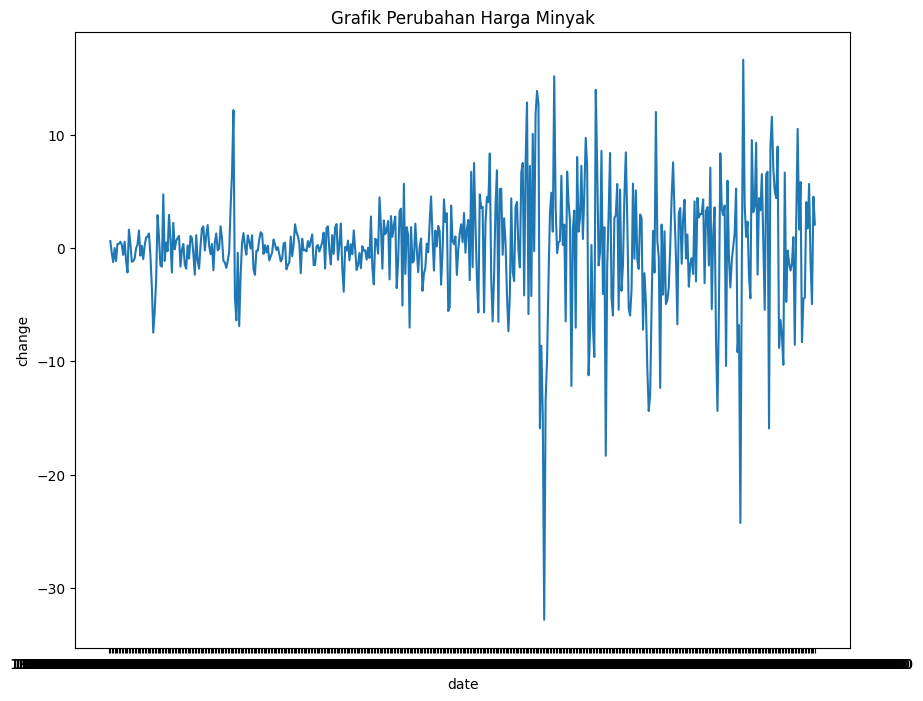

In [9]:
# Plot garis Waktu vs Perubahan Harga
plt.figure(figsize=(10, 8))
sns.lineplot(data=co_data, x='date', y='change')
plt.title('Grafik Perubahan Harga Minyak')
plt.show()

In [10]:
# Mengganti nama kolom untuk model prophet
co_data = co_data.rename(columns={'date': 'ds', 'price': 'y'})
print(co_data.head())

                          ds      y  percentChange  change
0  1983-06-01 00:00:00+00:00  31.38            NaN     NaN
1  1983-07-01 00:00:00+00:00  32.00          1.976    0.62
2  1983-08-01 00:00:00+00:00  31.59         -1.281   -0.41
3  1983-09-01 00:00:00+00:00  30.36         -3.894   -1.23
4  1983-10-01 00:00:00+00:00  30.37          0.033    0.01


In [11]:
# Menghapus zona waktu dari kolom 'ds'
co_data['ds'] = pd.to_datetime(co_data['ds']).dt.tz_localize(None)

In [12]:
# Membuat model Prophet
model = Prophet()

In [13]:
# Fitting model with data
model.fit(co_data[['ds', 'y']])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8qbi327/y5vxo2q7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8qbi327/0kht5pn5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5375', 'data', 'file=/tmp/tmp_8qbi327/y5vxo2q7.json', 'init=/tmp/tmp_8qbi327/0kht5pn5.json', 'output', 'file=/tmp/tmp_8qbi327/prophet_model6ej23y5t/prophet_model-20240707121056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:10:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


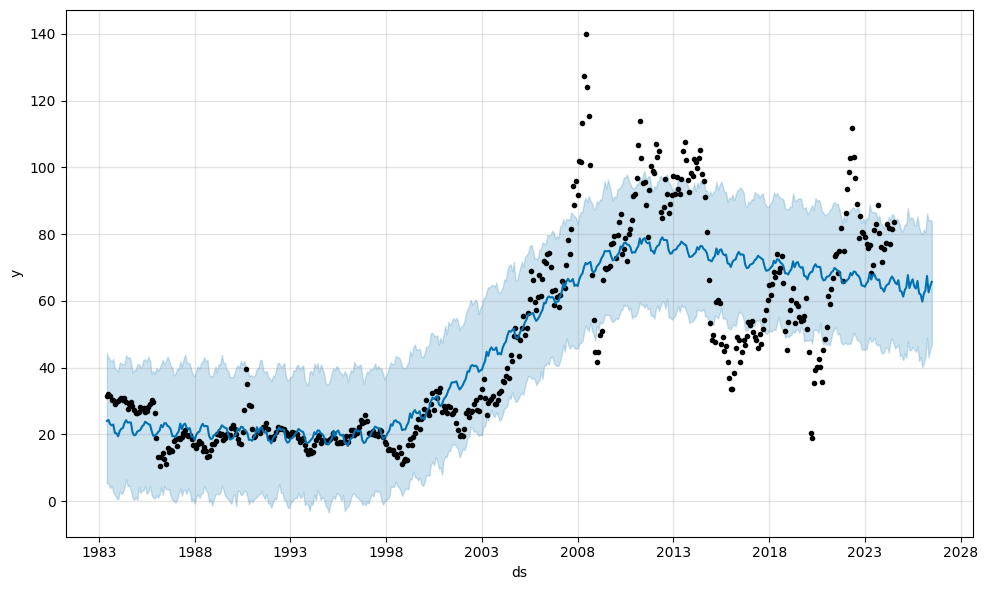

            ds       yhat  yhat_lower  yhat_upper
506 2025-07-31  64.308006   45.587609   82.716139
507 2025-08-31  63.726840   44.756672   82.704347
508 2025-09-30  65.984910   46.498465   85.295044
509 2025-10-31  62.249421   41.955060   82.119380
510 2025-11-30  61.924601   43.273757   80.439638
511 2025-12-31  59.804780   40.060924   80.103355
512 2026-01-31  62.260588   41.616839   81.282858
513 2026-02-28  63.203221   43.028478   80.550553
514 2026-03-31  67.511255   49.048247   86.216244
515 2026-04-30  62.566467   42.960948   84.053544
516 2026-05-31  64.433886   45.720329   84.249437
517 2026-06-30  65.737158   46.900091   83.938396


In [14]:
# Melakukan prediksi menggunakan model Prophet
future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

# Pastikan kolom 'yhat' ada dalam hasil prediksi
if 'yhat' in forecast.columns:
    # Plot ramalan
    fig1 = model.plot(forecast)
    plt.title('')
    plt.show()

    # Tampilkan hasil prediksi terakhir
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))
else:
    print("Kolom 'yhat' tidak ditemukan dalam hasil prediksi. Kolom yang tersedia:", forecast.columns)

In [15]:
# Menyiapkan environment RL
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [16]:
# Initialize Q-table
Q = {}
returns_sum = {}
returns_count = {}
total_rewards = []

In [17]:
def calculate_reward(predicted_price):
    # Contoh sederhana: Reward berdasarkan perbedaan antara prediksi harga dan harga saat ini
    current_price = co_data['y'].iloc[-1]  # Harga saat ini
    reward = predicted_price - current_price
    return reward


In [18]:
def get_action(state, epsilon):
    # Fungsi untuk memilih tindakan berdasarkan epsilon-greedy policy
    if np.random.rand() < epsilon:
        return np.random.choice(action_size)
    else:
        return max(Q[state], key=Q[state].get)

In [19]:
# Hyperparameters
n_episodes = 1000
max_t = 1000
gamma = 0.99
alpha = 0.1
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 0.995

In [20]:
# Monte Carlo Control

for i_episode in range(1, n_episodes + 1):
    state = tuple(env.reset())
    episode = []
    epsilon = max(epsilon_end, epsilon_start * (epsilon_decay ** i_episode))
    total_reward = 0

    for t in range(max_t):
        if state not in Q:
            Q[state] = {a: 0.0 for a in range(action_size)}

        # Dapatkan prediksi Nabi untuk langkah waktu berikutnya
        next_time_idx = len(co_data) + t  #  dataframe Indeks untuk langkah waktu berikutnya di masa depan
        if next_time_idx < len(forecast):
            predicted_price = forecast['yhat'].iloc[next_time_idx]
            # Anda juga dapat menggunakan batas ketidakpastian jika diperlukan: predicted_price = forecast['yhat_lower'].iloc[next_time_idx]

            # Lakukan tindakan RL berdasarkan prediksi prophet
            # Misalnya, sesuaikan perhitungan hadiah berdasarkan predicted_price
            reward = calculate_reward(predicted_price)

            action = get_action(state, epsilon)
            next_state, _, done, _ = env.step(action)
            episode.append((state, action, reward))
            total_reward += reward

            if done:
                break

            state = tuple(next_state)
        else:
            break  #  Berhenti jika next_time_idx melebihi panjang perkiraan

    total_rewards.append(total_reward)

# Perbarui nilai Q menggunakan metode Monte Carlo
    G = 0
    for state, action, reward in reversed(episode):
        if state not in Q:
            Q[state] = {a: 0.0 for a in range(action_size)}

        G = gamma * G + reward
        if not (state, action) in [(x[0], x[1]) for x in episode[:-1]]:
            if (state, action) not in returns_sum:
                returns_sum[(state, action)] = 0.0
                returns_count[(state, action)] = 0
            returns_sum[(state, action)] += G
            returns_count[(state, action)] += 1
            Q[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]

    if i_episode % 100 == 0:
        print(f"Episode {i_episode}/{n_episodes}")

env.close()



/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 100/1000
Episode 200/1000
Episode 300/1000
Episode 400/1000
Episode 500/1000
Episode 600/1000
Episode 700/1000
Episode 800/1000
Episode 900/1000
Episode 1000/1000


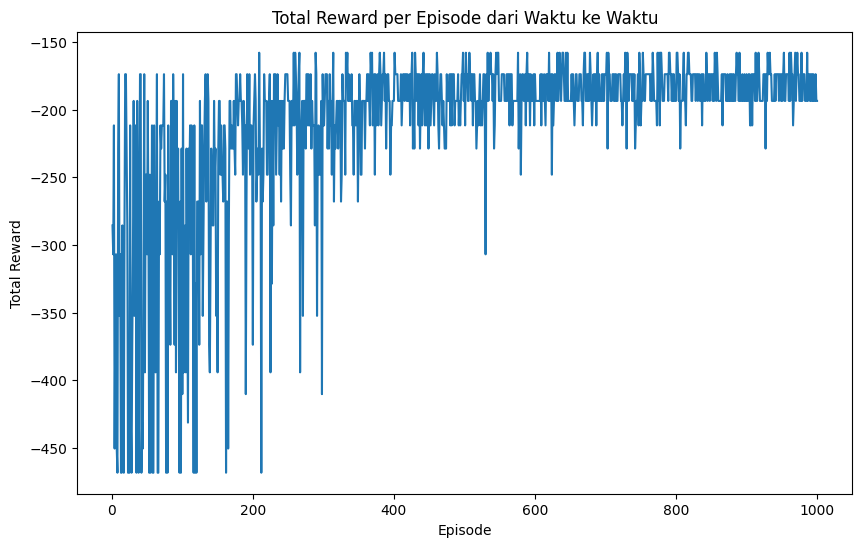

In [21]:

#Plot total rewards per episode
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(total_rewards) + 1), total_rewards)  # Use len(total_rewards) for x-axis
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode dari Waktu ke Waktu')
plt.show()